In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


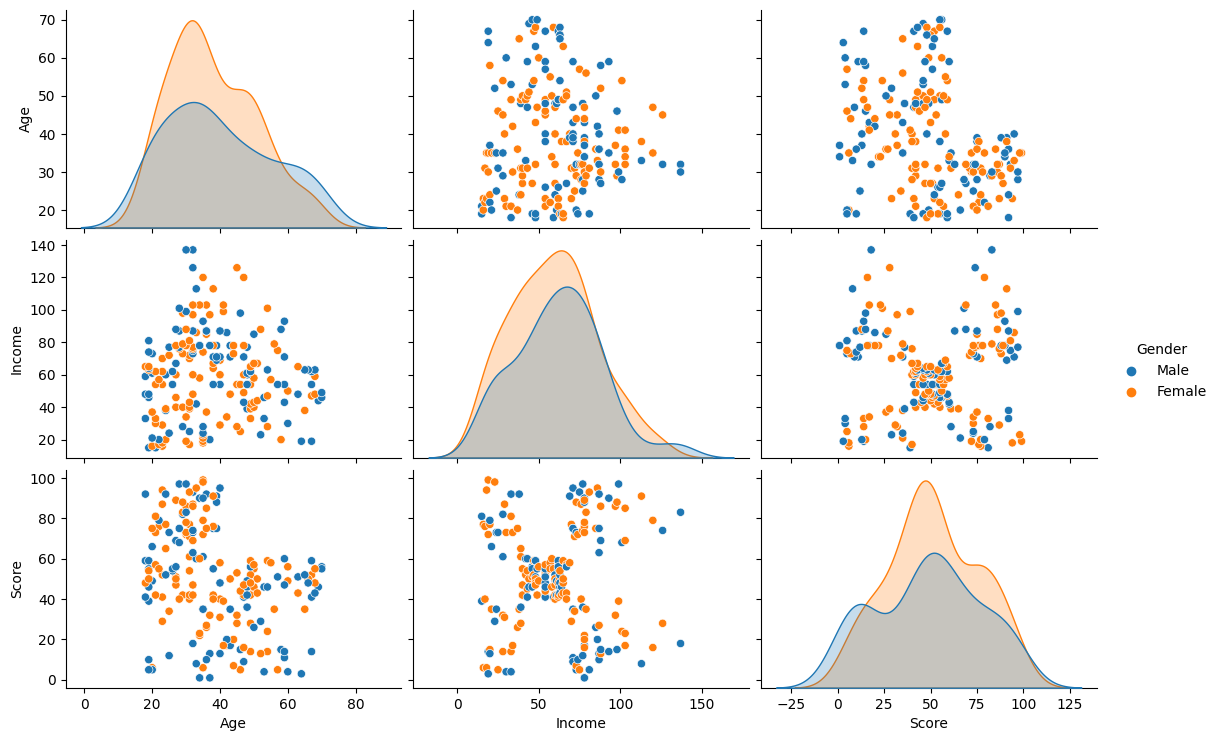

In [36]:
sns.pairplot(df, hue='Gender', aspect=1.5)
plt.show()

In [37]:
df.drop(['Gender'], axis=1,inplace=True)
df.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [38]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)   # minpoints - 1
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)
distances[:,1]

array([12.20655562,  4.58257569, 15.13274595,  1.73205081,  7.54983444,
        1.73205081,  7.54983444, 13.03840481, 11.40175425,  6.164414  ,
        9.11043358,  4.12310563,  9.        ,  2.82842712,  7.54983444,
        2.82842712,  3.        ,  9.11043358,  9.11043358,  4.12310563,
        3.        ,  5.74456265, 10.67707825,  6.08276253,  7.07106781,
        7.87400787,  5.19615242, 11.70469991,  5.19615242,  7.48331477,
        7.61577311,  7.21110255,  7.61577311,  7.81024968,  7.07106781,
        7.28010989,  7.68114575,  9.05538514, 10.24695077,  7.28010989,
       13.15294644,  7.81024968,  6.4807407 ,  3.74165739,  8.06225775,
        8.06225775,  3.74165739,  5.38516481,  2.        ,  2.        ,
        3.46410162,  3.74165739,  5.83095189,  6.4807407 ,  4.35889894,
        5.        ,  3.46410162,  4.58257569,  5.83095189,  4.35889894,
        3.16227766,  4.47213595,  4.24264069,  6.4807407 ,  4.12310563,
        1.        ,  7.        ,  4.24264069,  1.        ,  6.70

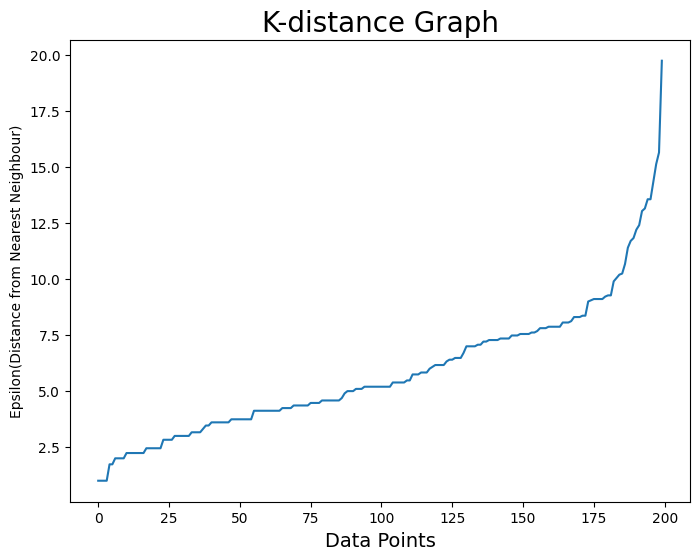

In [39]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points',fontsize=14)
plt.ylabel('Epsilon(Distance from Nearest Neighbour)')
plt.show()

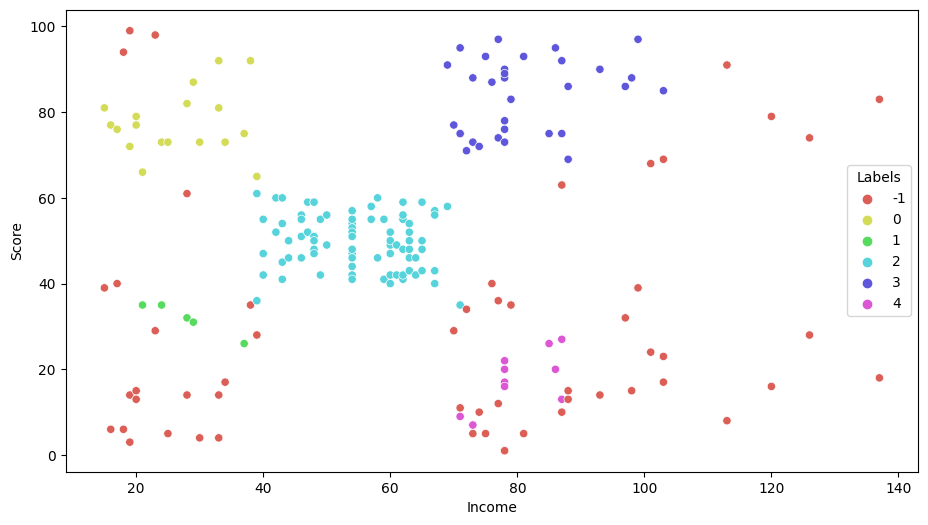

silhouette 0.1617019634576551


In [40]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
db = DBSCAN(eps=11, min_samples=5).fit(df)
df['Labels'] = db.labels_
silhouette = silhouette_score(df, df['Labels'])
plt.figure(figsize=(11, 6))
sns.scatterplot(x=df['Income'],y= df['Score'], hue=df['Labels'],palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
#plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()
print('silhouette',silhouette)
